TimeSeries
==========

The [TimeSeries](api/kineticstoolkit.TimeSeries.rst) class is the basis of most Kinetic Toolkit's modules and is the only class that users have to learn after python standard types and numpy arrays.

------------------------

***The three roles of the TimeSeries class are to:***

1. *organize multidimensional data in time;*
2. *deal with events;*
3. *associate metadata to data.*

------------------------

TimeSeries are largely inspired by Matlab's `timeseries` and `tscollection`.


TimeSeries basics
-----------------

Every TimeSeries contains the following attributes:

- `time`: A numpy array that contains the time vector.
- `data`: A dict where each entry is a numpy array, with the first dimension corresponding to time.
- `events`: An optional list of events.
- `time_info`: Metadata corresponding to time, that contains at least the time unit.
- `data_info`: Optional metadata.

A TimeSeries in its simplest form contains a time vector and at least one data series. For example:

In [1]:
import kineticstoolkit.lab as ktk
import numpy as np

ts = ktk.TimeSeries()
ts.time = np.arange(0, 10, 0.1)  # 10 seconds at 10 Hz
ts.data['Sinus'] = np.sin(ts.time)

ts

TimeSeries with attributes:
         time: <array of shape (100,)>
         data: <dict with 1 entries>
    time_info: <dict with 1 entries>
    data_info: <dict with 0 entries>
       events: <list of 0 items>

In [2]:
ts.data

{
    'Sinus': <array of shape (100,)>
}

TimeSeries can be [plotted](api/kineticstoolkit.TimeSeries.plot.rst) directly using Matplotlib:

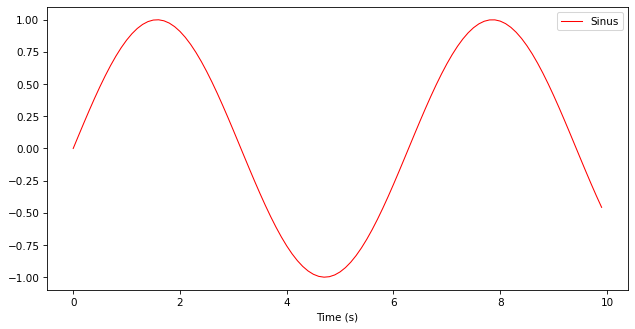

In [3]:
ts.plot()

A TimeSeries can contain many independent data that share a same time vector:

In [4]:
ts.data['Cosinus'] = np.cos(ts.time)

ts

TimeSeries with attributes:
         time: <array of shape (100,)>
         data: <dict with 2 entries>
    time_info: <dict with 1 entries>
    data_info: <dict with 0 entries>
       events: <list of 0 items>

In [5]:
ts.data

{
      'Sinus': <array of shape (100,)>
    'Cosinus': <array of shape (100,)>
}

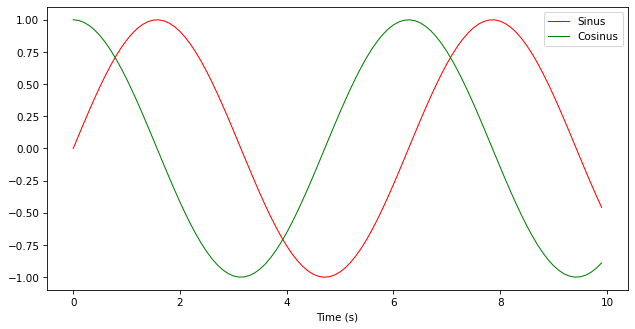

In [6]:
ts.plot()

A TimeSeries can also contain multidimensional data, as long as the first dimension corresponds to time. Here, we simulate a moving kinematics marker.

In [7]:
# Initialize the numpy array to 100 samples of a (x, y, z, 1) position vector.
ts.data['Marker1'] = np.empty((100, 4))

# Simulate a randomly moving marker
np.random.seed(0)
ts.data['Marker1'][:, 0] = np.cumsum(np.cumsum(0.01 * (np.random.rand(100) - 0.5)))  # x
ts.data['Marker1'][:, 1] = np.cumsum(np.cumsum(0.01 * (np.random.rand(100) - 0.5)))  # y
ts.data['Marker1'][:, 2] = np.cumsum(np.cumsum(0.01 * (np.random.rand(100) - 0.5)))  # z
ts.data['Marker1'][:, 3] = 1                                                         # 1

ts.data

{
      'Sinus': <array of shape (100,)>
    'Cosinus': <array of shape (100,)>
    'Marker1': <array of shape (100, 4)>
}

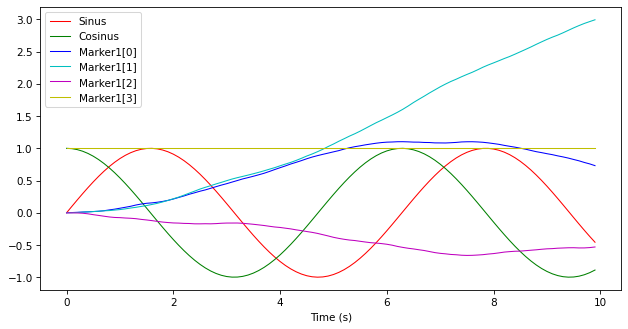

In [8]:
ts.plot()

Exporting and importing pandas DataFrames
-----------------------------------------

TimeSeries integrate well with pandas DataFrames and therefore with a plethora or data analysis softwares, using the [TimeSeries.to_dataframe()](api/kineticstoolkit.TimeSeries.to_dataframe.rst) and [TimeSeries.from_dataframe()](api/kineticstoolkit.TimeSeries.from_dataframe.rst) methods. For example, exporting the previous TimeSeries to a DataFrame gives:

In [9]:
df = ts.to_dataframe()

df

,Sinus,Cosinus,Marker1[0],Marker1[1],Marker1[2],Marker1[3]
0.0,0.000000,1.000000,0.000488,0.001778,-0.001882,1.0
0.1,0.099833,0.995004,0.003128,0.001256,-0.001801,1.0
0.2,0.198669,0.980067,0.006796,0.003087,-0.002942,1.0
0.3,0.295520,0.955336,0.010912,0.009539,-0.007287,1.0
0.4,0.389418,0.921061,0.014265,0.013478,-0.016385,1.0
...,...,...,...,...,...,...
9.5,-0.075151,-0.997172,0.827000,2.869612,-0.542776,1.0
9.6,-0.174327,-0.984688,0.806256,2.905226,-0.546104,1.0
9.7,-0.271761,-0.962365,0.780714,2.938383,-0.545809,1.0
9.8,-0.366479,-0.930426,0.758461,2.967121,-0.540786,1.0


Note the brackets in the Marker1 headers that indicate multidimensional data. For higher dimensions, these brackets would multiple indexes: for example, a series of rigid 4x4 transformation matrices would require 16 columns and the indexes would go from [0,0] to [3,3].

Now, importing from a DataFrame:

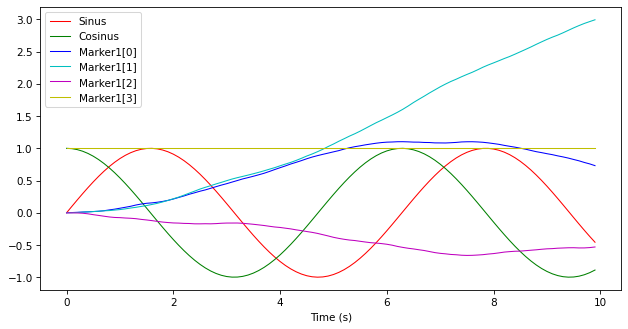

In [10]:
ts2 = ktk.TimeSeries.from_dataframe(df)

ts2.plot()

For the rest of this tutorial, we will work with wheelchair propulsion kinetic data from a CSV file.

In [11]:
import pandas as pd

# Read some columns
df = pd.read_csv(ktk.config.root_folder + '/data/timeseries/smartwheel.csv',
                 usecols=[18, 19, 20, 21, 22, 23],
                 names=['Forces[0]', 'Forces[1]', 'Forces[2]',
                        'Moments[0]', 'Moments[1]', 'Moments[2]'],
                 nrows=5000)

# Assign time to the DataFrame's index, where the sampling rate is 240 Hz.
df.index = np.arange(df.shape[0]) / 240
df

,Forces[0],Forces[1],Forces[2],Moments[0],Moments[1],Moments[2]
0.000000,1.27,-0.89,-0.20,-0.03,0.05,-0.03
0.004167,0.49,-0.83,-0.51,0.02,-0.01,-0.13
0.008333,0.00,-0.78,-0.51,0.04,-0.07,-0.18
0.012500,-0.13,-0.93,-0.41,0.03,-0.16,-0.18
0.016667,-0.02,-0.89,0.00,0.01,-0.21,-0.13
...,...,...,...,...,...,...
20.812500,0.87,-1.73,0.00,0.08,-0.07,-0.03
20.816667,0.68,-2.38,0.20,0.07,-0.05,0.08
20.820833,0.39,-2.72,0.20,0.02,0.00,0.10
20.825000,0.32,-2.51,0.41,0.04,0.05,0.08


Now, we convert this DataFrame to a TimeSeries:

In [12]:
ts = ktk.TimeSeries.from_dataframe(df)

ts

TimeSeries with attributes:
         time: <array of shape (5000,)>
         data: <dict with 2 entries>
    time_info: <dict with 1 entries>
    data_info: <dict with 0 entries>
       events: <list of 0 items>

In [13]:
ts.data

{
     'Forces': <array of shape (5000, 3)>
    'Moments': <array of shape (5000, 3)>
}

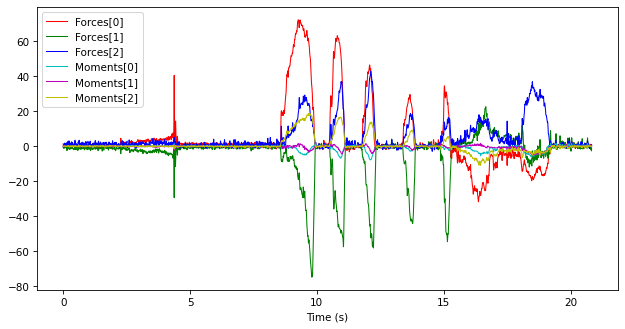

In [14]:
ts.plot()

Metadata
--------

The `time_info` property associates metadata to the time vector. It is a dictionary where each key is the name of one metadata. By default, `time_info` includes the `Unit` metadata, which corresponds to `s`. Any other metadata can be added by adding new keys in `time_info`.

In [15]:
ts.time_info

{
    'Unit': 's'
}

Similarly, the `data_info` property associates metadata to data. This property is a dictionary of dictionaries, where the outer key corresponds to the data key, and the inner key is the metadata. The [TimeSeries.add_data_info()](api/kineticstoolkit.TimeSeries.add_data_info.rst) method eases the management of `data_info`.

In [16]:
ts = ts.add_data_info('Forces', 'Unit', 'N')
ts = ts.add_data_info('Moments', 'Unit', 'Nm')

Unless explicitly mentioned, metadata is not used for calculation and is optional. It is simply a way to clarify the data by adding information to it. Some functions however read metadata: for example, the [TimeSeries.plot()](api/kineticstoolkit.TimeSeries.plot.rst) method looks for possible `Unit` metadata and prints it on the y axis.

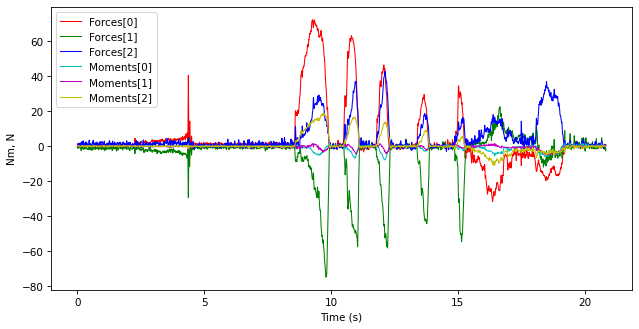

In [17]:
ts.plot()

Events
------

In the figure above, we see that the TimeSeries contains cyclic data that could be characterized by events. A first spike was generated at about 4 seconds: this event corresponds to a synchronization signal that we generated by gently impacting the instrumented pushrim. Thereafter, we see a series of pushes and recoveries. We will add these events to the TimeSeries.

There are several ways to edit the events of a TimeSeries:
- Editing events manually, using the [TimeSeries.add_event()](api/kineticstoolkit.TimeSeries.add_event.rst) and [TimeSeries.remove_event()](api/kineticstoolkit.TimeSeries.remove_event.rst) methods;
- Editing events interactively, using the [TimeSeries.ui_edit_events()](api/kineticstoolkit.TimeSeries.ui_edit_events.rst) method;
- Adding events automatically, for example using the [cycles](cycles.rst) module that can detect cycles automatically.

In this tutorial, we will add the events manually.

In [18]:
ts = ts.add_event(4.35, 'sync')
ts = ts.add_event(8.56, 'push')
ts = ts.add_event(9.93, 'recovery')
ts = ts.add_event(10.50, 'push')
ts = ts.add_event(11.12, 'recovery')
ts = ts.add_event(11.78, 'push')
ts = ts.add_event(12.33, 'recovery')
ts = ts.add_event(13.39, 'push')
ts = ts.add_event(13.88, 'recovery')
ts = ts.add_event(14.86, 'push')
ts = ts.add_event(15.30, 'recovery')

These events are now added to the TimeSeries' list of events:

In [19]:
ts

TimeSeries with attributes:
         time: <array of shape (5000,)>
         data: <dict with 2 entries>
    time_info: <dict with 1 entries>
    data_info: <dict with 2 entries>
       events: <list of 11 items>

In [20]:
ts.events

[TimeSeriesEvent(time=4.35, name='sync'),
 TimeSeriesEvent(time=8.56, name='push'),
 TimeSeriesEvent(time=9.93, name='recovery'),
 TimeSeriesEvent(time=10.5, name='push'),
 TimeSeriesEvent(time=11.12, name='recovery'),
 TimeSeriesEvent(time=11.78, name='push'),
 TimeSeriesEvent(time=12.33, name='recovery'),
 TimeSeriesEvent(time=13.39, name='push'),
 TimeSeriesEvent(time=13.88, name='recovery'),
 TimeSeriesEvent(time=14.86, name='push'),
 TimeSeriesEvent(time=15.3, name='recovery')]

If we plot again the TimeSeries, we can see the added events.

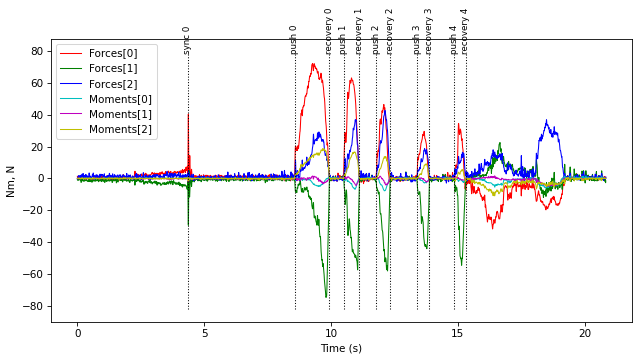

In [21]:
ts.plot()

### Using events to synchronize TimeSeries ###

Let's see how we can make use of these events. First, the `sync` event can be used to set the zero-time. This would be useful to sync this TimeSeries with data from another wheel, or with any another instrument that also has such synchronization event. The [TimeSeries.sync_event()](api/kineticstoolkit.TimeSeries.sync_event.rst) shifts the TimeSeries' time and every event's time so that the sync event becomes the new "zero-time".

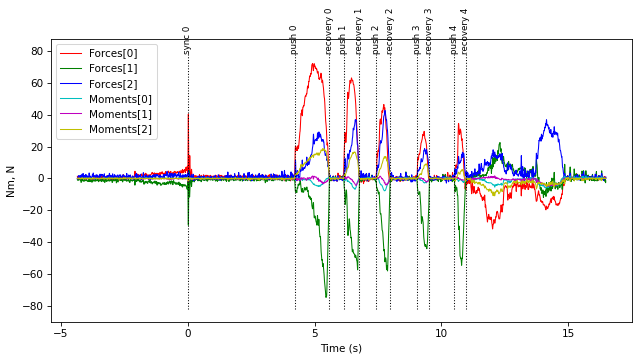

In [22]:
ts = ts.sync_event('sync')
ts.plot()

### Using events to extract shorter TimeSeries ###

The `TimeSeries` class comes with a myriad of methods such as [TimeSeries.get_ts_after_event()](api/kineticstoolkit.TimeSeries.get_ts_after_event.rst), [TimeSeries.get_ts_between_events()](api/kineticstoolkit.TimeSeries.get_ts_between_events.rst), etc. For example, if we want to analyze data of the four first pushes and get rid of any other data, we could extract a new TimeSeries that contains only these data:

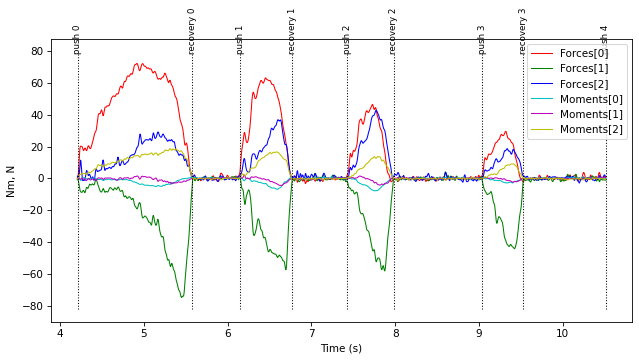

In [23]:
# Extract data push event 0 up to push event 4.
ts2 = ts.get_ts_between_events('push', 'push', 0, 4, inclusive=True)

# Remove the events that are not contained into the new time range.
ts2 = ts2.trim_events()

ts2.plot()

Subsetting and merging timeseries
---------------------------------

We can use the [TimeSeries.get_subset()](api/kineticstoolkit.TimeSeries.get_subset.rst) method to extract some signals from a TimeSeries. For example, if we only want to keep force information and get rid of the moments:

In [24]:
ts3 = ts2.get_subset(['Forces'])

ts3.data

{
    'Forces': <array of shape (1514, 3)>
}

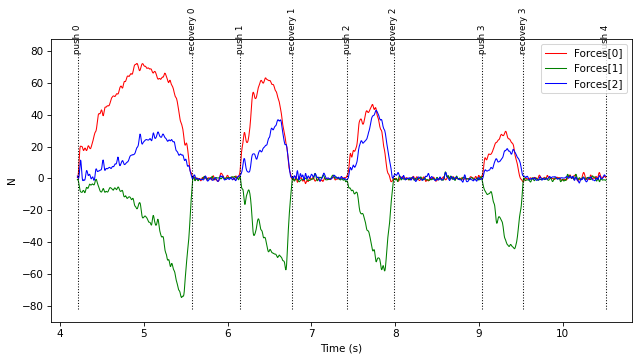

In [25]:
ts3.plot()

For more information, please refer to the [API reference for the TimeSeries class](api/kineticstoolkit.TimeSeries.rst).